In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("/Users/priyarao/Downloads/flask_app/FinalData_v1.csv")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,Washington,Redmond,Redmond,Washington
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,California,Santa Clara,Secaucus,New Jersey
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,Texas,Irving,Irving,Texas
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,Delaware,New Castle,Iselin,New Jersey
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,Alabama,Birmingham,Iselin,New Jersey


In [4]:
df1 = data.copy()

In [5]:
df1.isna().sum()

Visa_Class                     0
Employer_Name                  0
SOC_Title                      0
Job_Title                      0
Full_Time_Position             0
Prevailing_Annual_Wage         0
Employer_Country               0
Case_Status                    0
Quarter                        0
Year                           0
Work_state                584987
Work_city                     44
Employer_city                  9
Employer_state              1597
dtype: int64

In [6]:
df1.shape

(3469308, 14)

In [7]:
df1["Case_Status"].value_counts()

CERTIFIED    3146855
WITHDRAWN     290696
DENIED         31757
Name: Case_Status, dtype: int64

In [12]:
df1["Case_Status"] = df1["Case_Status"].str.upper()

In [13]:
df1["Case_Status"] = df1["Case_Status"].replace(
    "CERTIFIED - WITHDRAWN", "CERTIFIED-WITHDRAWN"
)

In [14]:
df1["Case_Status"] = df1["Case_Status"].replace("CERTIFIED-WITHDRAWN", "WITHDRAWN")

In [15]:
df1["Case_Status"] = df1["Case_Status"].replace("WITHDRAWN", "DENIED")

In [16]:
df1["Employer_Country"].value_counts()

USA    3469308
Name: Employer_Country, dtype: int64

In [17]:
df1["Employer_Country"] = df1["Employer_Country"].replace(
    "United States Of America", "USA"
)

In [18]:
df1["Employer_Country"] = df1["Employer_Country"].replace(
    "United States of America", "USA"
)

In [19]:
indexAge = df1[(df1["Employer_Country"] != "USA")].index
df1.drop(indexAge, inplace=True)

In [21]:
df1

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,Washington,Redmond,Redmond,Washington
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,California,Santa Clara,Secaucus,New Jersey
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,Texas,Irving,Irving,Texas
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,Delaware,New Castle,Iselin,New Jersey
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,Alabama,Birmingham,Iselin,New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469303,H-1B,FAST SWITCH LTD,"Software Developers, Applications",SENIOR JAVA DEVELOPER,Y,106905.6,USA,DENIED,Q3,2022,Ohio,Dublin,Dublin,Ohio
3469304,H-1B,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,Physicists,POSTDOCTORAL ASSOCIATE,Y,50398.0,USA,CERTIFIED,Q3,2022,Massachusetts,Cambridge,Cambridge,Massachusetts
3469305,H-1B,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,"Geoscientists, Except Hydrologists And Geograp...",RESEARCH SCIENTIST,Y,61069.0,USA,CERTIFIED,Q3,2022,Massachusetts,Cambridge,Cambridge,Massachusetts
3469306,H-1B,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,Materials Engineers,POSTDOCTORAL ASSOCIATE,Y,41392.0,USA,CERTIFIED,Q3,2022,Massachusetts,Cambridge,Cambridge,Massachusetts


In [22]:
# df1["Work_state"] = df1["Worksite"].str.split(",").str[1]

In [23]:
# df1['Work_city'] = df1['Worksite'].str.split(',').str[0]

In [24]:
df1.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,Washington,Redmond,Redmond,Washington
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,California,Santa Clara,Secaucus,New Jersey
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,Texas,Irving,Irving,Texas
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,Delaware,New Castle,Iselin,New Jersey
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,Alabama,Birmingham,Iselin,New Jersey


In [11]:
#df1 = df1.drop(['Worksite'],axis =1)

In [25]:
df1.isna().sum()

Visa_Class                     0
Employer_Name                  0
SOC_Title                      0
Job_Title                      0
Full_Time_Position             0
Prevailing_Annual_Wage         0
Employer_Country               0
Case_Status                    0
Quarter                        0
Year                           0
Work_state                584987
Work_city                     44
Employer_city                  9
Employer_state              1597
dtype: int64

In [26]:
df1 = df1.dropna(subset=["Work_state"])

In [27]:
df1.shape

(2884321, 14)

In [28]:
df1.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,Washington,Redmond,Redmond,Washington
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,California,Santa Clara,Secaucus,New Jersey
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,Texas,Irving,Irving,Texas
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,Delaware,New Castle,Iselin,New Jersey
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,Alabama,Birmingham,Iselin,New Jersey


In [24]:
#df1['Employer_city'] = df1['Employer_Location'].str.split(',').str[0]

In [25]:
#df1['Employer_state'] = df1['Employer_Location'].str.split(',').str[1]

In [26]:
#df1 = df1.drop(['Employer_Location'],axis =1)

In [29]:
df1.isna().sum()

Visa_Class                   0
Employer_Name                0
SOC_Title                    0
Job_Title                    0
Full_Time_Position           0
Prevailing_Annual_Wage       0
Employer_Country             0
Case_Status                  0
Quarter                      0
Year                         0
Work_state                   0
Work_city                   44
Employer_city                9
Employer_state            1146
dtype: int64

In [30]:
df1 = df1.dropna(subset=["Employer_city"])

In [31]:
df1["Work_city"] = df1["Work_city"].str.upper()

In [32]:
df1["Work_state"] = df1["Work_state"].str.upper()

In [33]:
df1["Employer_city"] = df1["Employer_city"].str.upper()

In [34]:
df1["Employer_state"] = df1["Employer_state"].str.upper()

In [35]:
df1["Visa_Class"].value_counts()

H-1B               2812391
E-3 Australian       59680
H-1B1 Singapore       6265
H-1B1 Chile           5976
Name: Visa_Class, dtype: int64

In [36]:
df1 = df1.drop(df1[(df1["Visa_Class"] == "E-3 Australian")].index)

In [37]:
df1 = df1.drop(df1[(df1["Visa_Class"] == "H-1B1 Singapore")].index)

In [38]:
df1 = df1.drop(df1[(df1["Visa_Class"] == "H-1B1 Chile")].index)

In [39]:
df1["Job_Title"].value_counts().head(20)

SOFTWARE ENGINEER              137962
SOFTWARE DEVELOPER             112243
PROGRAMMER ANALYST              67140
SENIOR SOFTWARE ENGINEER        38139
SENIOR SYSTEMS ANALYST JC60     26913
ASSISTANT PROFESSOR             23560
SYSTEMS ANALYST                 21617
MANAGER JC50                    20146
BUSINESS ANALYST                18435
DEVELOPER                       18063
ANALYST                         15552
CONSULTANT                      14473
SENIOR SOFTWARE DEVELOPER       14324
ASSOCIATE                       14293
SENIOR CONSULTANT               13310
PROJECT MANAGER                 13086
JAVA DEVELOPER                  13058
COMPUTER SYSTEMS ANALYST        12835
COMPUTER PROGRAMMER             12403
ARCHITECT                       11897
Name: Job_Title, dtype: int64

In [40]:
df1["Job_Title"] = df1["Job_Title"].str.upper()

In [41]:
numState = [
    "Alabama",
    "Alaska",
    "Arizona",
    "Arkansas",
    "California",
    "Colorado",
    "Connecticut",
    "Delaware",
    "Florida",
    "Georgia",
    "Hawaii",
    "Idaho",
    "Illinois",
    "Indiana",
    "Iowa",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Maine",
    "Maryland",
    "Massachusetts",
    "Michigan",
    "Minnesota",
    "Mississippi",
    "Missouri",
    "Montana",
    "Nebraska",
    "Nevada",
    "New Hampshire",
    "New Jersey",
    "New Mexico",
    "New York",
    "North Carolina",
    "North Dakota",
    "Ohio",
    "Oklahoma",
    "Oregon",
    "Pennsylvania",
    "Rhode Island",
    "South Carolina",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Utah",
    "Vermont",
    "Virginia",
    "Washington",
    "West Virginia",
    "Wisconsin",
    "Wyoming",
]

In [42]:
numStateUpper = [x.upper() for x in numState]

In [43]:
numStateUpper

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

In [44]:
df1["Work_state"] = df1["Work_state"].str.lstrip()

In [45]:
df1 = df1.loc[df1["Work_state"].isin(numStateUpper)].reset_index(drop=True)

In [46]:
df1["Work_state"].unique()

array(['WASHINGTON', 'CALIFORNIA', 'TEXAS', 'DELAWARE', 'ALABAMA',
       'FLORIDA', 'MARYLAND', 'GEORGIA', 'PENNSYLVANIA', 'NEW YORK',
       'MINNESOTA', 'NEW MEXICO', 'MICHIGAN', 'MASSACHUSETTS', 'ARIZONA',
       'NEW JERSEY', 'ILLINOIS', 'INDIANA', 'NORTH CAROLINA', 'OHIO',
       'MISSOURI', 'NEW HAMPSHIRE', 'ARKANSAS', 'VIRGINIA', 'KANSAS',
       'COLORADO', 'CONNECTICUT', 'WISCONSIN', 'WEST VIRGINIA', 'ALASKA',
       'LOUISIANA', 'KENTUCKY', 'TENNESSEE', 'IDAHO', 'SOUTH CAROLINA',
       'RHODE ISLAND', 'OREGON', 'NEVADA', 'UTAH', 'NORTH DAKOTA',
       'MISSISSIPPI', 'OKLAHOMA', 'HAWAII', 'SOUTH DAKOTA', 'NEBRASKA',
       'MAINE', 'IOWA', 'WYOMING', 'MONTANA', 'VERMONT'], dtype=object)

In [47]:
df1.shape

(2789751, 14)

In [48]:
df1["Employer_state"] = df1["Employer_state"].str.lstrip()

In [49]:
df1 = df1.loc[df1["Employer_state"].isin(numStateUpper)].reset_index(drop=True)

In [50]:
df1["Employer_state"].unique()

array(['WASHINGTON', 'NEW JERSEY', 'TEXAS', 'MASSACHUSETTS', 'FLORIDA',
       'CALIFORNIA', 'SOUTH CAROLINA', 'MARYLAND', 'MICHIGAN', 'ARIZONA',
       'TENNESSEE', 'NEW YORK', 'OHIO', 'PENNSYLVANIA', 'NORTH CAROLINA',
       'MISSOURI', 'CONNECTICUT', 'NEW HAMPSHIRE', 'ILLINOIS',
       'MINNESOTA', 'VIRGINIA', 'KANSAS', 'COLORADO', 'GEORGIA',
       'WISCONSIN', 'INDIANA', 'WEST VIRGINIA', 'ALASKA', 'KENTUCKY',
       'IDAHO', 'LOUISIANA', 'NORTH DAKOTA', 'NEVADA', 'RHODE ISLAND',
       'DELAWARE', 'NEW MEXICO', 'ARKANSAS', 'HAWAII', 'SOUTH DAKOTA',
       'OREGON', 'NEBRASKA', 'MAINE', 'IOWA', 'ALABAMA', 'UTAH',
       'MISSISSIPPI', 'OKLAHOMA', 'VERMONT', 'MONTANA', 'WYOMING'],
      dtype=object)

<AxesSubplot:title={'center':'CASE STATUS vs NUMBER OF PETITIONS'}, xlabel='CASE STATUS', ylabel='NUMBER OF PETITIONS'>

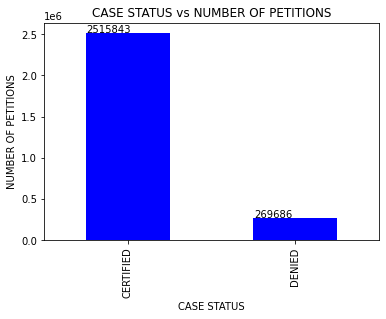

In [51]:
plot_status_number = (
    df1["Case_Status"]
    .value_counts()
    .plot(title="CASE STATUS vs NUMBER OF PETITIONS", kind="bar", color="blue")
)
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")
for p in plot_status_number.patches:
    plot_status_number.annotate(
        str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005)
    )
plot_status_number

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    64892
INFOSYS LIMITED                           51343
TATA CONSULTANCY SERVICES LIMITED         47153
DELOITTE CONSULTING LLP                   29037
CAPGEMINI AMERICA INC                     26515
Google LLC                                23778
Microsoft Corporation                     21330
Ernst & Young U.S. LLP                    20671
WIPRO LIMITED                             18757
AMAZON.COM SERVICES LLC                   14993
IBM INDIA PRIVATE LIMITED                 14392
HCL AMERICA, INC.                         14290
ACCENTURE LLP                             14109
ERNST & YOUNG U.S. LLP                    14004
TECH MAHINDRA (AMERICAS),INC.             13605
Name: Employer_Name, dtype: int64


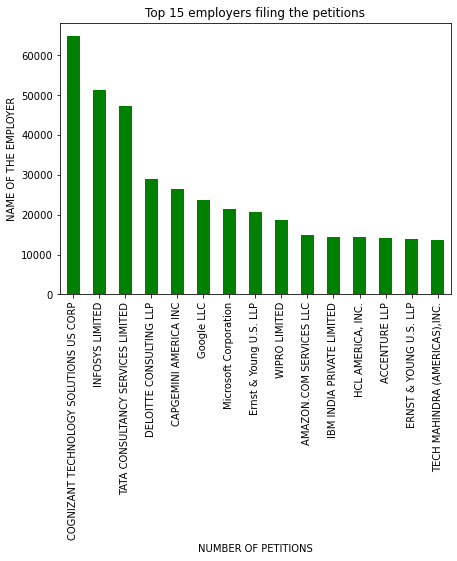

In [52]:
plot_status_topemp = (
    df1["Employer_Name"]
    .value_counts()
    .head(15)
    .plot.bar(
        title="Top 15 employers filing the petitions", color="green", figsize=(7, 5)
    )
)
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER")
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS")
plot_status_topemp
print(df1["Employer_Name"].value_counts().head(15))

Software Developers, Applications                   827188
Computer Systems Analysts                           258282
Computer Occupations, All Other                     141004
Software Developers, Systems Software               137914
Computer Programmers                                121417
Operations Research Analysts                         48835
Computer Systems Engineers/Architects                48668
Mechanical Engineers                                 48257
Management Analysts                                  44022
Computer And Information Systems Managers            43761
Database Administrators                              41573
Financial Analysts                                   40044
Software Quality Assurance Engineers And Testers     39000
Accountants And Auditors                             38123
Computer Systems Analyst                             36852
Name: SOC_Title, dtype: int64


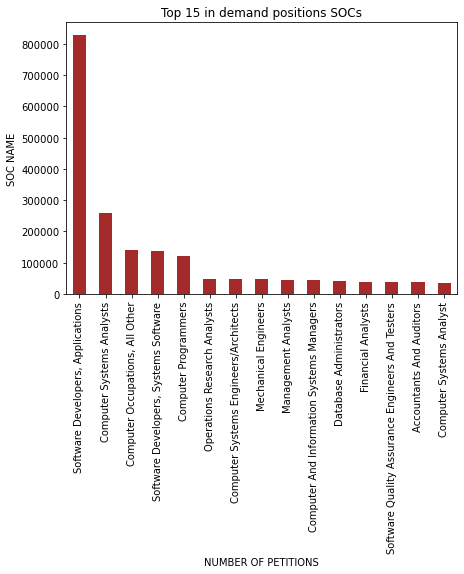

In [53]:
plot_status_topsoc = (
    df1["SOC_Title"]
    .value_counts()
    .head(15)
    .plot.bar(title="Top 15 in demand positions SOCs", color="brown", figsize=(7, 5))
)
plot_status_topsoc.set_ylabel("SOC NAME")
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS")
plot_status_topsoc
print(df1["SOC_Title"].value_counts().head(15))

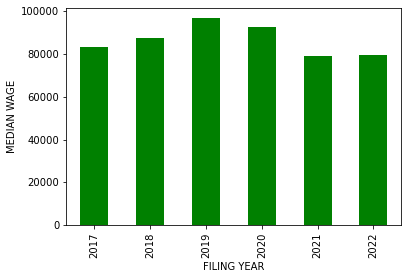

,Prevailing_Annual_Wage
,median
Year,
2017,83366.0
2018,87485.0
2019,96720.0
2020,92498.0
2021,78957.0
2022,79477.0


In [54]:
dfsalaries_trends_year = (
    df1.loc[:, ["Prevailing_Annual_Wage", "Year"]].groupby(["Year"]).agg(["median"])
)

plot_salaries_trends_year = dfsalaries_trends_year.plot(
    kind="bar", color="g", legend=None
)
plot_salaries_trends_year.set_xlabel("FILING YEAR")
plot_salaries_trends_year.set_ylabel("MEDIAN WAGE")
plt.show()
dfsalaries_trends_year

DOWNSAMPLING

In [52]:
#table_temp_2_Dx = df1[df1['Case_Status'] == 'DENIED']


In [53]:
#table_temp_2_Cx = df1[df1['Case_Status'] == 'CERTIFIED']

In [54]:
#from sklearn.model_selection import train_test_split

In [55]:
#Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(df1[df1.Case_Status == 'CERTIFIED'],\
#                                                                                          table_temp_2_Cx.Case_Status, train_size= 0.35, random_state=1)


In [47]:
df1.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,WASHINGTON,REDMOND,REDMOND,WASHINGTON
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,CALIFORNIA,SANTA CLARA,SECAUCUS,NEW JERSEY
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,TEXAS,IRVING,IRVING,TEXAS
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,DELAWARE,NEW CASTLE,ISELIN,NEW JERSEY
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,ALABAMA,BIRMINGHAM,ISELIN,NEW JERSEY


In [160]:
#y = df1[df1.columns[df1.columns.isin(['Case_Status'])]]
#X = df1[df1.columns[~df1.columns.isin(['Case_Status'])]]


In [216]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter
#sm = SMOTE(random_state=42)
#X1,y1 = sm.fit_resample(X,y)

In [331]:
#training_dataframe = Input_Certified.append(table_temp_2_Dx)

ONE HOT ENCODING

In [44]:
df1.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,WASHINGTON,REDMOND,REDMOND,WASHINGTON
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,CALIFORNIA,SANTA CLARA,SECAUCUS,NEW JERSEY
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,TEXAS,IRVING,IRVING,TEXAS
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,DELAWARE,NEW CASTLE,ISELIN,NEW JERSEY
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,ALABAMA,BIRMINGHAM,ISELIN,NEW JERSEY


In [45]:

#df2 = training_dataframe.copy()
df2 = df1.copy()

In [46]:
df2['Case_Status_en'] = df2['Case_Status'].map(dict(CERTIFIED=1, DENIED=0))

In [43]:
#df2 = df2.drop('Case_Status', axis=1)

In [47]:
df2.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state,Case_Status_en
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,WASHINGTON,REDMOND,REDMOND,WASHINGTON,1
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,CALIFORNIA,SANTA CLARA,SECAUCUS,NEW JERSEY,1
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,TEXAS,IRVING,IRVING,TEXAS,1
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,DELAWARE,NEW CASTLE,ISELIN,NEW JERSEY,1
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,ALABAMA,BIRMINGHAM,ISELIN,NEW JERSEY,1


In [48]:
df2['Full_Time_Position_en'] = df2['Full_Time_Position'].map(dict(Y=1, N=0))

In [101]:
#df2 = df2.drop('Full_Time_Position', axis=1)


CATEGORIZATION

In [49]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 100000:
        return "LOW"
    elif wage >100000 and wage <= 200000:
        return "MEDIUM"
    elif wage >200000 and wage<=500000:
        return "HIGH"
    elif wage >=500000:
        return "VERY HIGH"

In [50]:
df2['WAGE_CATEGORY'] = df2['Prevailing_Annual_Wage'].apply(wage_categorization)

In [51]:
df2.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state,Case_Status_en,Full_Time_Position_en,WAGE_CATEGORY
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,WASHINGTON,REDMOND,REDMOND,WASHINGTON,1,1,MEDIUM
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,CALIFORNIA,SANTA CLARA,SECAUCUS,NEW JERSEY,1,1,LOW
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,TEXAS,IRVING,IRVING,TEXAS,1,1,LOW
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,DELAWARE,NEW CASTLE,ISELIN,NEW JERSEY,1,1,LOW
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,ALABAMA,BIRMINGHAM,ISELIN,NEW JERSEY,1,1,LOW


DUMMY ENCODING 

In [241]:
#df2 = pd.get_dummies(data=df2, columns=['Year'])

In [242]:
#df2 = pd.get_dummies(data=df2, columns=['WAGE_CATEGORY'])

In [52]:
df2.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state,Case_Status_en,Full_Time_Position_en,WAGE_CATEGORY
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,WASHINGTON,REDMOND,REDMOND,WASHINGTON,1,1,MEDIUM
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,CALIFORNIA,SANTA CLARA,SECAUCUS,NEW JERSEY,1,1,LOW
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,TEXAS,IRVING,IRVING,TEXAS,1,1,LOW
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,DELAWARE,NEW CASTLE,ISELIN,NEW JERSEY,1,1,LOW
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,ALABAMA,BIRMINGHAM,ISELIN,NEW JERSEY,1,1,LOW


In [53]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [54]:
training_dataframe_1 = df2.loc[:,['Employer_Name', 'Case_Status']]
training_dataframe_1s = df2.loc[:,['SOC_Title', 'Case_Status']]
training_dataframe_1j = df2.loc[:,['Job_Title', 'Case_Status']]

In [55]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.Case_Status == 'CERTIFIED'].Employer_Name
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.Case_Status == 'CERTIFIED'].SOC_Title
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.Case_Status == 'CERTIFIED'].Job_Title
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [56]:
total_counts = training_dataframe_1.Employer_Name.value_counts()
total_counts_s = training_dataframe_1s.SOC_Title.value_counts()
total_counts_j = training_dataframe_1j.Job_Title.value_counts()

In [57]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
df2['EMPLOYER_ACCEPTANCE'] = df2.Employer_Name.map(final_classification_employer)

In [58]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
df2['SOC_ACCEPTANCE'] = df2.SOC_Title.map(final_classification_soc)

In [59]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
df2['JOB_ACCEPTANCE'] = df2.Job_Title.map(final_classification_job)


In [60]:
df2.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Prevailing_Annual_Wage,Employer_Country,Case_Status,Quarter,Year,Work_state,Work_city,Employer_city,Employer_state,Case_Status_en,Full_Time_Position_en,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,SOC_ACCEPTANCE,JOB_ACCEPTANCE
0,H-1B,MICROSOFT CORPORATION,"Software Developers, Applications",SOFTWARE ENGINEER,Y,112549.0,USA,CERTIFIED,Q1,2017,WASHINGTON,REDMOND,REDMOND,WASHINGTON,1,1,MEDIUM,VHA,VHA,VHA
1,H-1B,ERNST & YOUNG U.S. LLP,Accountants And Auditors,TAX SENIOR,Y,79976.0,USA,CERTIFIED,Q1,2017,CALIFORNIA,SANTA CLARA,SECAUCUS,NEW JERSEY,1,1,LOW,VHA,VHA,VHA
2,H-1B,LOGIXHUB LLC,Database Administrators,DATABASE ADMINISTRATOR,Y,77792.0,USA,CERTIFIED,Q1,2017,TEXAS,IRVING,IRVING,TEXAS,1,1,LOW,VHA,VHA,VHA
3,H-1B,"HEXAWARE TECHNOLOGIES, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,84406.0,USA,CERTIFIED,Q1,2017,DELAWARE,NEW CASTLE,ISELIN,NEW JERSEY,1,1,LOW,HA,VHA,VHA
4,H-1B,"ECLOUD LABS,INC.","Software Developers, Applications",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,Y,87714.0,USA,CERTIFIED,Q1,2017,ALABAMA,BIRMINGHAM,ISELIN,NEW JERSEY,1,1,LOW,VHA,VHA,VHA


In [61]:
print("Case Status ",df2.Case_Status.nunique())
print("Unique Employers ",df2.EMPLOYER_ACCEPTANCE.nunique())
#print("Wages Category", df2.WAGE_CATEGORY.nunique())
print("Unique SOCs ", df2.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",df2.JOB_ACCEPTANCE.nunique())
#print("Unique Filing Year ",df2.FILING_YEAR.nunique())
print("Unique Worksite State ",df2.Work_state.nunique())
print("Unique Employment Type ", df2.Full_Time_Position.nunique())

Case Status  2
Unique Employers  6
Unique SOCs  6
Unique Job Titles  6
Unique Worksite State  50
Unique Employment Type  2


In [62]:
df2['Year'] = df2['Year'].astype('int')
df2.sort_index(inplace = True)
df2 = df2.loc[:, ['Case_Status_en', 'Year', 'Work_state', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'Full_Time_Position_en']]
df2.head()

,Case_Status_en,Year,Work_state,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,Full_Time_Position_en
0,1,2017,WASHINGTON,MEDIUM,VHA,VHA,VHA,1
1,1,2017,CALIFORNIA,LOW,VHA,VHA,VHA,1
2,1,2017,TEXAS,LOW,VHA,VHA,VHA,1
3,1,2017,DELAWARE,LOW,HA,VHA,VHA,1
4,1,2017,ALABAMA,LOW,VHA,VHA,VHA,1


In [63]:
final_df_train = pd.get_dummies(df2, columns=['Year', 'Work_state', 'Full_Time_Position_en', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head()

,Case_Status_en,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Work_state_ALASKA,Work_state_ARIZONA,Work_state_ARKANSAS,Work_state_CALIFORNIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [64]:
final_df_train.shape

(2785529, 75)

In [65]:
X11 = final_df_train.iloc[:,1:]
y11 = final_df_train.iloc[:,0]

In [1]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [66]:
import imblearn


In [67]:

from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
X12,y12 = sm.fit_resample(X11,y11)

In [ ]:
# RFE for feature elimination
#RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

'''from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model,n_features_to_select =40,step = 1)            # 40 features to select
fit = rfe.fit(final_df_train.iloc[:,1:], final_df_train.iloc[:,0])
support_rfe = rfe.support_
length_cols = list(final_df_train.iloc[:,1:].columns.values)
list_selected = []
for index in range(len(length_cols)):
    if support_rfe[index] == True:
        list_selected.append(length_cols[index])
    else:
        pass
print(list_selected)
print(rfe.ranking_)
'''

"from sklearn.linear_model import LogisticRegression\nfrom sklearn.feature_selection import RFE\nmodel = LogisticRegression(solver='lbfgs', max_iter=1000)\nrfe = RFE(model,n_features_to_select =40,step = 1)            # 40 features to select\nfit = rfe.fit(final_df_train.iloc[:,1:], final_df_train.iloc[:,0])\nsupport_rfe = rfe.support_\nlength_cols = list(final_df_train.iloc[:,1:].columns.values)\nlist_selected = []\nfor index in range(len(length_cols)):\n    if support_rfe[index] == True:\n        list_selected.append(length_cols[index])\n    else:\n        pass\nprint(list_selected)\nprint(rfe.ranking_)\n"

In [68]:
y12.value_counts(normalize=True)

1    0.5
0    0.5
Name: Case_Status_en, dtype: float64

In [66]:
#unique_listcols = [col.split('_')[0] for col in list_selected]
#set(unique_listcols)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X12, y12, test_size = 0.30, random_state=1)
#y_train[y_train==1].shape
#y_test[y_test==1].shape

In [70]:
X_train.shape


(3522180, 74)

In [ ]:
# Modelling 

In [71]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train) 

In [72]:
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test, y_pred))

[[551967 203115]
 [107834 646590]]

              precision    recall  f1-score   support

           0       0.84      0.73      0.78    755082
           1       0.76      0.86      0.81    754424

    accuracy                           0.79   1509506
   macro avg       0.80      0.79      0.79   1509506
weighted avg       0.80      0.79      0.79   1509506



In [80]:
print(dtree.feature_importances_)

[2.57273376e-02 3.88519868e-03 4.48666482e-03 2.50889816e-03
 5.94913587e-03 1.83757174e-04 6.13834439e-04 6.04976890e-04
 2.13449053e-03 5.58714154e-04 7.09646510e-04 3.65347515e-04
 6.78542144e-04 8.00573249e-04 2.81924023e-04 3.57698773e-04
 8.67629791e-04 5.59974965e-04 6.89093878e-04 4.71868382e-04
 5.01797735e-04 6.49353251e-04 2.96979037e-04 6.66839683e-04
 1.01870656e-03 7.85441919e-04 6.24855605e-04 6.39841181e-04
 7.06039640e-04 2.50862083e-04 7.13741512e-04 4.22464115e-04
 3.59211652e-04 8.49719580e-04 5.13380807e-04 1.15413763e-03
 5.80875674e-04 4.83251188e-04 6.69948061e-04 6.42920739e-04
 7.10528644e-04 7.00622181e-04 5.05131821e-04 5.11787524e-04
 3.60595135e-04 7.36533778e-04 7.85434895e-04 5.79306997e-04
 3.35605850e-04 7.59747720e-04 1.43286893e-03 3.84575234e-04
 4.90906144e-04 2.09888973e-04 2.71060818e-03 3.11050993e-03
 2.89791894e-03 1.76011987e-03 1.80341965e-03 1.66030954e-02
 2.96070665e-04 2.14505027e-03 6.72196839e-01 1.70007503e-05
 1.85863946e-02 3.097083

In [73]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(X_train, y_train) 

LogisticRegression(max_iter=1000)

In [74]:
y_pred_lr = lr_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_lr))
print()
print(classification_report(y_test, y_pred_lr))

[[516253 238829]
 [120758 633666]]

              precision    recall  f1-score   support

           0       0.81      0.68      0.74    755082
           1       0.73      0.84      0.78    754424

    accuracy                           0.76   1509506
   macro avg       0.77      0.76      0.76   1509506
weighted avg       0.77      0.76      0.76   1509506



In [75]:
# Save the model as serialized object pickle
import pickle
# Save the model as serialized object pickle
pickle.dump(lr_clf, open('/Users/priyarao/Desktop/Test/lr_clf.pkl', 'wb'))

In [82]:
import os
os.getcwd()

'/Users/priyarao/Downloads'

In [73]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75, random_state=50)

In [73]:
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print()
print(classification_report(y_test, y_pred_rf))

[[551787 203295]
 [107769 646655]]

              precision    recall  f1-score   support

           0       0.84      0.73      0.78    755082
           1       0.76      0.86      0.81    754424

    accuracy                           0.79   1509506
   macro avg       0.80      0.79      0.79   1509506
weighted avg       0.80      0.79      0.79   1509506



In [83]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000)
mlp.fit(X_train, y_train)

In [81]:
y_pred_mlp = mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred_mlp))
print()
print(classification_report(y_test, y_pred_mlp))

NameError: name 'mlp' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knc = KNeighborsClassifier()
Knc.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)

/Users/pratikkhedekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
y_pred_svc = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred_svc))
print()
print(classification_report(y_test, y_pred_svc))

[[495031 260051]
 [103502 650922]]

              precision    recall  f1-score   support

           0       0.83      0.66      0.73    755082
           1       0.71      0.86      0.78    754424

    accuracy                           0.76   1509506
   macro avg       0.77      0.76      0.76   1509506
weighted avg       0.77      0.76      0.76   1509506



### Hyper-parameter tuning


In [ ]:
final_df_train.head()

,Case_Status_en,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Work_state_ALASKA,Work_state_ARIZONA,Work_state_ARKANSAS,Work_state_CALIFORNIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Dropping Covid Years
#dfhyper1 = final_df_train.drop(columns=['Year_2020','Year_2021'])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(dfhyper1.iloc[:,1:], dfhyper1.iloc[:, 0], test_size = 0.20, random_state=1)


In [ ]:
# Decision Tree Classifier with No Covid Years

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train) 
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test, y_pred))

[[ 30653  23269]
 [  9202 166923]]

              precision    recall  f1-score   support

           0       0.77      0.57      0.65     53922
           1       0.88      0.95      0.91    176125

    accuracy                           0.86    230047
   macro avg       0.82      0.76      0.78    230047
weighted avg       0.85      0.86      0.85    230047



In [ ]:
# Logistic Regression with No covid Years
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(X_train, y_train) 
y_pred_lr = lr_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_lr))
print()
print(classification_report(y_test, y_pred_lr))

[[ 29809  24113]
 [  8457 167668]]

              precision    recall  f1-score   support

           0       0.78      0.55      0.65     53922
           1       0.87      0.95      0.91    176125

    accuracy                           0.86    230047
   macro avg       0.83      0.75      0.78    230047
weighted avg       0.85      0.86      0.85    230047



In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print()
print(classification_report(y_test, y_pred_rf))

[[ 30373  23549]
 [  8873 167252]]

              precision    recall  f1-score   support

           0       0.77      0.56      0.65     53922
           1       0.88      0.95      0.91    176125

    accuracy                           0.86    230047
   macro avg       0.83      0.76      0.78    230047
weighted avg       0.85      0.86      0.85    230047



In [ ]:
# Grid Search CV on Decision Tree
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_



In [ ]:
dtree_grid_search(X_train,y_train,5)

{'criterion': 'gini', 'max_depth': 14}

In [ ]:

dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= 14)
dtree = dtree.fit(X_train, y_train) 
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test, y_pred))

[[551746 203336]
 [111135 643289]]

              precision    recall  f1-score   support

           0       0.83      0.73      0.78    755082
           1       0.76      0.85      0.80    754424

    accuracy                           0.79   1509506
   macro avg       0.80      0.79      0.79   1509506
weighted avg       0.80      0.79      0.79   1509506



In [ ]:
final_df_train['Case_Status_en'].value_counts(normalize=True)

1    0.765538
0    0.234462
Name: Case_Status_en, dtype: float64

In [ ]:
#SMORT Analysis
dfsmort = final_df_train.copy()

In [ ]:
X = dfsmort.iloc[:,1:]
y = dfsmort.iloc[:,0]


1     1
11    1
17    1
18    0
21    1
Name: Case_Status_en, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
X1,y1 = sm.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state=1)


In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train) 
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test, y_pred))

[[220822  43212]
 [ 50535 213758]]

              precision    recall  f1-score   support

           0       0.81      0.84      0.82    264034
           1       0.83      0.81      0.82    264293

    accuracy                           0.82    528327
   macro avg       0.82      0.82      0.82    528327
weighted avg       0.82      0.82      0.82    528327

